<a href="https://colab.research.google.com/github/kobeynw/College_Attendance_Analysis/blob/main/ME275_ProjectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT DATASET AND CONVERT TO DATAFRAME

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ME 275 Project Dataset.csv to ME 275 Project Dataset.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ME 275 Project Dataset.csv']))
df.head()

,par_bin,bin_n,par_fam_inc,par_inc_log,kid_fam_rank,kid_fam_bin,kid_fam_inc,kidzero,kid_inc_log,kid_inc_log_z,kid_inc_log_z1000,college,kid_teenbirth_givenf,coll_qual_20_rank
0,1,98677,1700,7.18,0.30,30.11,22100,0.18,9.59,7.89,2.26,0.25,0.29,0.34
1,2,98677,4100,8.32,0.31,31.72,23900,0.16,9.65,8.14,2.36,0.26,0.30,0.35
2,3,98678,6100,8.71,0.32,32.64,24400,0.14,9.68,8.30,2.43,0.27,0.30,0.35
3,4,98677,7700,8.95,0.33,33.65,25500,0.13,9.73,8.43,2.49,0.28,0.31,0.35
4,5,98677,9200,9.13,0.34,34.30,26400,0.13,9.75,8.51,2.53,0.29,0.30,0.36


SPLIT INTO INCOME AND PERCENTAGE OF KIDS WHO ATTENDED COLLEGE

In [ ]:
par_fam_inc = df['par_fam_inc']
college = df['college']

DESCRIBE THE DATA

In [ ]:
par_fam_inc.describe()

count       100.00
mean      87148.00
std      148202.80
min        1700.00
25%       30650.00
50%       60150.00
75%       97500.00
max     1408800.00
Name: par_fam_inc, dtype: float64

In [ ]:
college.describe()

count   100.00
mean      0.59
std       0.20
min       0.25
25%       0.42
50%       0.58
75%       0.75
max       0.94
Name: college, dtype: float64

<ipython-input-7-d4b87eda11e0>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


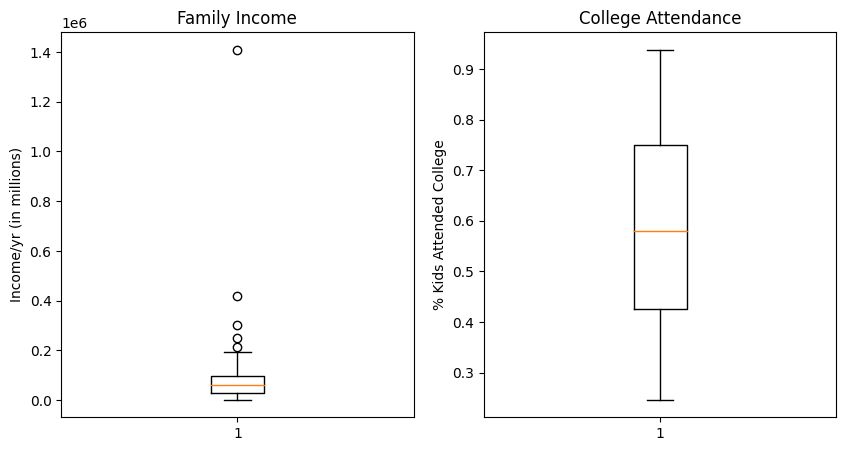

In [ ]:
plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.boxplot(par_fam_inc)
plt.title('Family Income')
plt.ylabel('Income/yr (in millions)')
plt.subplot(1, 2, 2)
plt.boxplot(college)
plt.title('College Attendance')
plt.ylabel('% Kids Attended College')
plt.show()

STRIP AWAY TOP SIX BINS THAT HAVE OUTLIER INCOMES (for visualization only)

In [ ]:
par_fam_inc_stripped = df['par_fam_inc'][:-6]
college_stripped = df['college'][:-6]

In [ ]:
par_fam_inc_stripped.describe()

count       94.00
mean     63025.53
std      41668.79
min       1700.00
25%      29075.00
50%      56250.00
75%      89275.00
max     179100.00
Name: par_fam_inc, dtype: float64

In [ ]:
college_stripped.describe()

count   94.00
mean     0.57
std      0.18
min      0.25
25%      0.42
50%      0.56
75%      0.72
max      0.90
Name: college, dtype: float64

<ipython-input-11-d5bc91d06d76>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


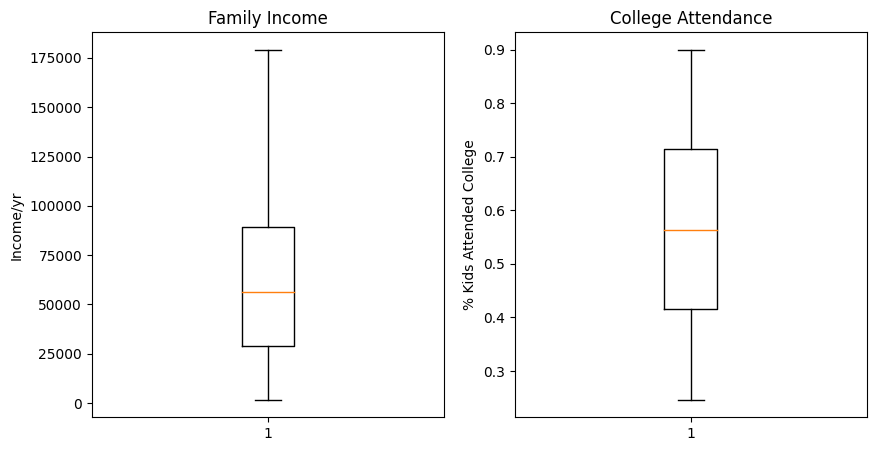

In [ ]:
plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.boxplot(par_fam_inc_stripped)
plt.title('Family Income')
plt.ylabel('Income/yr')
plt.subplot(1, 2, 2)
plt.boxplot(college_stripped)
plt.title('College Attendance')
plt.ylabel('% Kids Attended College')
plt.show()

SHOW DISTRIBUTION OF THE DATA THROUGH PLOTS

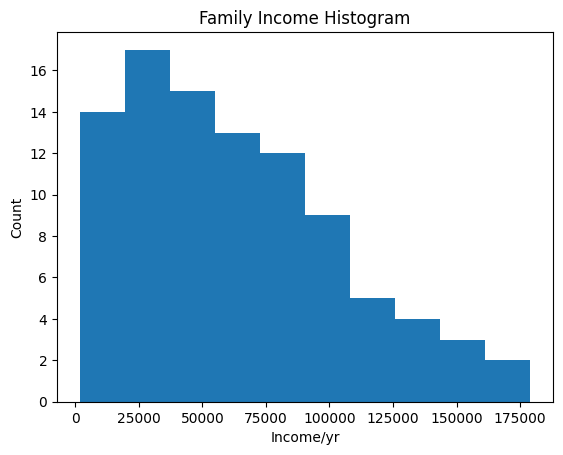

In [ ]:
plt.hist(par_fam_inc_stripped)
plt.title('Family Income Histogram')
plt.xlabel('Income/yr')
plt.ylabel('Count')
plt.show()

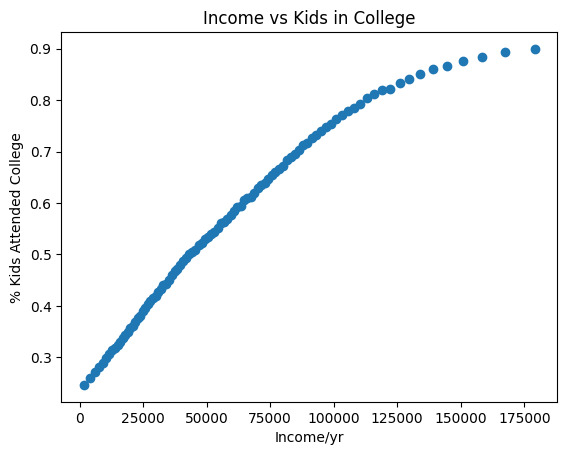

In [ ]:
plt.scatter(par_fam_inc_stripped, college_stripped)
plt.title('Income vs Kids in College')
plt.xlabel('Income/yr')
plt.ylabel('% Kids Attended College')
plt.show()

In [ ]:
np.corrcoef(par_fam_inc_stripped, college_stripped)

array([[1.        , 0.97902968],
       [0.97902968, 1.        ]])

In [ ]:
low_income = par_fam_inc[:50]
high_income = par_fam_inc[50:]
print(low_income.describe())
print(high_income.describe())

count      50.00
mean    31084.00
std     16086.11
min      1700.00
25%     18250.00
50%     30400.00
75%     44100.00
max     59500.00
Name: par_fam_inc, dtype: float64
count        50.00
mean     143212.00
std      194172.57
min       60800.00
25%       77475.00
50%       98000.00
75%      133025.00
max     1408800.00
Name: par_fam_inc, dtype: float64


In [ ]:
low_income_college = college[:50]
high_income_college = college[50:]
print(low_income_college.describe())
print(high_income_college.describe())

count   50.00
mean     0.42
std      0.09
min      0.25
25%      0.34
50%      0.42
75%      0.50
max      0.58
Name: college, dtype: float64
count   50.00
mean     0.76
std      0.11
min      0.58
25%      0.66
50%      0.75
75%      0.85
max      0.94
Name: college, dtype: float64


CONDUCT TWO-SAMPLE T-TEST

In [ ]:
stat.ttest_ind(low_income_college, high_income_college)

TtestResult(statistic=-16.37683292115647, pvalue=8.300737912581957e-30, df=98.0)

FURTHER ANALYSIS (ANALYZE PERCENTAGE OF ALL STUDENTS THAT ATTEND COLLEGE, IRRESPECTIVE OF INCOME)

In [ ]:
mean_s = np.mean(college)
mean_s

0.5893405982800001

In [ ]:
# Apparent Effect
mean_s - 0.55

0.03934059828000003

CONDUCT ONE-SAMPLE T-TEST

In [ ]:
stat.ttest_1samp(college, 0.55, alternative="greater")

TtestResult(statistic=2.0070395454747523, pvalue=0.023735884474051075, df=99)